In [23]:
import pandas as pd
import numpy as np
from IPython.display import Image
from collections import OrderedDict
from math import pi

from bokeh.io import output_file, show
from bokeh.palettes import Category10
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.models import LabelSet, ColumnDataSource

from bokeh.io import push_notebook, show, output_notebook
from bokeh.palettes import Category20c
from bokeh.layouts import row 
from bokeh.plotting import figure
from bokeh.transform import cumsum
from numpy import histogram, linspace
from bokeh.layouts import gridplot
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.io import show, output_file, output_notebook, push_notebook
from bokeh.layouts import row, column, gridplot
from bokeh.palettes import Spectral6, Category20c
from bokeh.transform import factor_cmap, cumsum
from bokeh.models.widgets import Paragraph,DataTable, TableColumn
from bokeh.models.widgets import Panel, Tabs
from bokeh.plotting import figure, curdoc, show
from bokeh.models import ColumnDataSource, FactorRange, CustomJS, Slider
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot, row, column, layout
import numpy as np
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.palettes import Spectral6,Spectral5,Spectral3
   
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap
from collections import OrderedDict

from collections import OrderedDict



from bokeh.models.widgets import Slider, RadioButtonGroup, Button
import numpy as np
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg as df

from numpy import histogram, linspace
from bokeh.models import ColumnarDataSource

In [24]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt 


In [25]:
df = pd.read_excel('C:\\Users\\Milgram\\Downloads\\Batch Monitoring Run Book.xlsx', parse_dates=[1]) 

In [26]:
airtemp_fig = figure()
windspeed_fig = figure()
comment_words = ' '
stopwords = set(STOPWORDS) 

In [27]:
# iterate through the csv file 
for val in df['Mitigation Steps']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
    

In [28]:
wordcloud = WordCloud(width = 800, height = 800, max_words=30,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 2).generate(comment_words) 

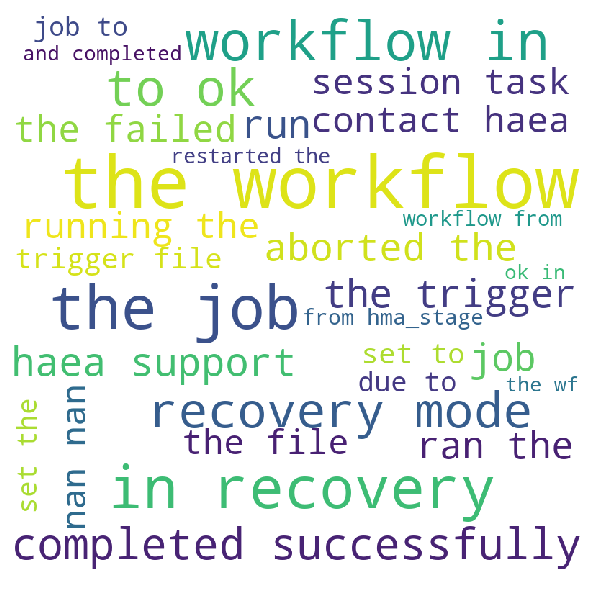

In [29]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [30]:
wordcloud.to_file("wc.png")

In [31]:
fwn = pd.DataFrame(df['Failed Workflow Name'].value_counts().head(8))

In [32]:
#fwn.rename(columns={'index':'Failed Workflow Name', 'Failed Workflow Name': 'count'},inplace= True)

In [33]:
fwn

,Failed Workflow Name
wf_SCHED_CTRLM_AM_QM_CAARS_INCR,23
wf_SCHED_CTRLM_MDMSTG_MDM_PREFERENCE_GENESIS,21
wf_SCHED_WARR_DAILY_CDC,18
wf_SCHED_EBIZ_DAILY,15
wf_SCHED_CTRLM_WEEKLY_EMAIL_KMA_ACXIOM,12
wf_SCHED_CTRLM_DAILY_KMA_CDM_CRM_RDR_KMF_DV_EDQIN_ODS_INCR,12
wf_SCHED_WEEKLY_SERVICE_DCRS_WARR_LOAD_GEN,12
wf_SCHED_CTRLM_DAILY_KMA_CDM_MDM_ENTERPRISE,11


In [34]:
fws = pd.DataFrame(df['Failed Workflow Session'].value_counts().head(8))

In [35]:
DC = df.groupby([df['Date'].dt.year, df['Date'].dt.month]).agg({'count'})

In [36]:
DC.to_csv('DateCount.csv')

In [37]:
y_pred=pd.read_csv("C:\\Users\\Milgram\\Downloads\\Hyundai Failure Prediction\\y_pred.csv")

In [38]:
y_pred


,Predicted_Date
0,10
1,10
2,10
3,10


In [39]:
y_train=pd.read_csv("C:\\Users\\Milgram\\Downloads\\Hyundai Failure Prediction\\y_train.csv")

In [40]:
y_train

,Unnamed: 0,Date_Diff
0,0,21
1,1,6
2,2,7
3,3,35
4,4,9
5,5,33
6,6,2
7,7,72
8,8,5
9,9,0


In [41]:
len(y_train)

16

In [45]:
y_test=pd.read_csv("C:\\Users\\Milgram\\Downloads\\Hyundai Failure Prediction\\y_test.csv")

In [46]:
y_test

,Unnamed: 0,Date_Diff
0,413,7
1,491,7
2,400,7
3,543,7


In [47]:
rmse=pd.read_excel("C:\\Users\\Milgram\\Downloads\\Hyundai Failure Prediction\\hyundai_rmse.xlsx")

In [48]:
rmse


,Workflow Name,Training/Testing_Ratio,RMSE
0,wf_SCHED_CTRLM_AM_QM_CAARS_INCR,80:20,3.43


In [50]:
fd=pd.read_csv("C:\\Users\\Milgram\\Downloads\\Hyundai Failure Prediction\\fd.csv")

In [51]:
fd.head()

,Unnamed: 0,Unnamed: 0.1,Date,Failed Workflow Session,Days,Date of Re-occurrence
0,0,413,2019-04-30,s_m_HMA_DM_DM_QM_TH_RDR_FIFO_EXCEPTION_PROC1_INS,10 days 00:00:00.000000000,2019-05-10
1,1,491,2019-06-04,s_m_HMA_DM_DM_QM_TH_RDR_FIFO_EXCEPTION_PROC1_INS,10 days 00:00:00.000000000,2019-06-14
2,2,400,2019-04-23,s_m_HMA_DM_DM_QM_TH_RDR_FIFO_EXCEPTION_PROC1_INS,10 days 00:00:00.000000000,2019-05-03
3,3,543,2019-07-02,s_m_HMA_DM_DM_QM_TH_RDR_FIFO_EXCEPTION_PROC1_INS,10 days 00:00:00.000000000,2019-07-12


In [52]:
#df_1 = pd.read_csv('C:\\Users\\Neha3.singh\\da_co_10jan_final.csv')

In [53]:
df_1 = pd.read_csv('C:\\Users\\Milgram\\Downloads\\Hyundai Failure Prediction\\da_co_10jan_final.csv')

In [54]:
df_1

,Month,Count
0,Sep'18,35
1,Oct'18,57
2,Nov'18,42
3,Dec'18,40
4,Jan'19,71
5,Feb'19,48
6,Mar'19,51
7,Apr'19,68
8,May'19,71
9,Jun'19,51


In [55]:
x=df['Failure Type'].value_counts()

In [56]:
df_2 = pd.Series(x).reset_index(name='Count').rename(columns={'index':'Failure Type'})

In [57]:
df_3=pd.read_csv("C:\\Users\\Milgram\\Downloads\\Hyundai Failure Prediction\\MissingValue Percentage_08.csv")

In [58]:
df_4=pd.read_csv("C:\\Users\\Milgram\\Downloads\\Hyundai Failure Prediction\\Hbar.csv")

In [59]:
df_4

,Unnamed: 0,Failed Workflow Name,Working_hours
0,0,wf_SCHED_DAILY_BLODS,75
1,1,wf_SCHED_USAI_ZIP_DEALER_TRACT,61
2,2,wf_SCHED_SPC_II_P2_EDW_HPC,41
3,3,wf_SCHED_CTRLM_DAILY_KMA_CRM,30
4,4,wf_SCHED_DAILY_OPIMUM_AOS,28
5,5,wf_SCHED_WARR_DAILY_CDC,21
6,6,wf_SCHED_CTRLM_DAILY_KMA_CRM_CROSSWALK_RECONCI...,8
7,7,wf_SCHED_VEND_DAILY_TRILOGY,5
8,8,wf_SCHED_CTRLM_DAILY_MDM_DV_PTREE_ACX_recovery,5
9,9,wf_SCHED_LMRS_DNC_OPTOUT_DAILY,4


In [61]:
df_5=pd.read_excel("C:\\Users\\Milgram\\Downloads\\Hyundai Failure Prediction\\FL.xlsx")

In [62]:
df_1.Month

0     Sep'18
1     Oct'18
2     Nov'18
3     Dec'18
4     Jan'19
5     Feb'19
6     Mar'19
7     Apr'19
8     May'19
9     Jun'19
10    Jul'19
11    Aug'19
12    Sep'19
13    Oct'19
Name: Month, dtype: object

In [63]:
df_6=pd.read_excel('C:\\Users\\Milgram\\Downloads\\Hyundai Failure Prediction\\CBU.xlsx')

In [64]:
df_6.fillna('-',inplace=True)

In [65]:
df_7=pd.read_csv("C:\\Users\\Milgram\\Downloads\\Hyundai Failure Prediction\\FWNF.csv")

In [68]:
output_file("DevHyundai.html")
tools="pan,wheel_zoom,box_zoom,reset,save,box_select,hover"

p1 = Paragraph(text="", width=500, height=100)

p2 = Paragraph(text="""  Predictive Analytics""", width=1000, height=100, style={'font-size': '400%', 'color':'maroon'})
p15 = Paragraph(text="""Advanced Analytics """, width=600, height=100, style={'font-size': '300%', 'color':'darkgreen'})
p16 = Paragraph(text="""Exploratory Data Analysis """, width=600, height=100, style={'font-size': '300%', 'color':'darkgreen'})

p3 = figure(plot_width=650, plot_height=450, title="Verbalism of Mitigation Step")
p3.image_url(url=['C:\\Users\\Neha3.singh\\wc.png'], x=0, y=0, w=0.8, h=0.8,anchor="bottom_left")
p3.xaxis.visible = None
p3.yaxis.visible =None
p3.title.text_font_size = '13pt' 
p3.title.text_color="navy" 


p4 = figure(plot_width=400, plot_height=400,x_axis_label="Failed Workflow Name", y_axis_label="Count",title="Trending Failed Workflow", tools=tools,toolbar_location="right" ,tooltips=[("Workflow","@x"),("Count","@top")])
p4.vbar(x=range(8), top=fwn['Failed Workflow Name'], width=0.9,fill_color=Spectral6)
p4.y_range.start =0
p4.y_range.end = 30
#p4.xaxis.major_label_orientation = pi/4
p4.title.text_font_size = '13pt' 
p4.title.text_color="navy" 
y0 = x
y1 = [10 - i for i in x]
y2 = [abs(i - 5) for i in x]
#p4.grid.grid_line_color = None

p5 = figure(plot_width=400, plot_height=400,x_axis_label="Failed Workflow Session", y_axis_label="Count",title="Measure of Workflow",tools=tools,toolbar_location="right",)
p5.line(x=range(8),y=fws['Failed Workflow Session'], color='maroon')
p5.circle(x=range(8),y=fws['Failed Workflow Session'],size=6, fill_color="navy")
p5.add_tools(HoverTool(tooltips=[("Workflow","@x"),("Count","@y")]))
p5.title.text_font_size = '13pt' 
p5.title.text_color="navy" 
#p5.grid.grid_line_color = None

p6 = figure(x_range = df_1.Month,plot_width=700, plot_height=400,x_axis_label="Month", y_axis_label="Count",title="Monthly Trend",tools=tools,toolbar_location="right",tooltips=[("Month","@x"),("Count","@y")])
p6.line(x=df_1.Month,y=df_1.Count, color='red')
p6.circle(x=df_1.Month,y=df_1.Count,size=6, fill_color='orange',line_color='orange')
#p6.xaxis.major_label_orientation = pi/4
p6.title.text_font_size = '13pt' 
p6.title.text_color="navy" 


p7 = figure(plot_width=700, plot_height=400,x_axis_label="Failure Type", y_axis_label="Count",title="Count of Failure Type ",tools=tools,toolbar_location="right",tooltips=[("Failure Type","@x"),("Count","@y")],
            y_range=[0,30], x_range=df_2['Failure Type'])
p7.segment(df_2['Failure Type'],0, df_2['Failure Type'], df_2['Count'], line_width=3, line_color="#35B778", )
p7.circle(df_2['Failure Type'], df_2['Count'], size=25, fill_color="darkred", line_color="darkgreen", line_width=3,) 
p7.xaxis.ticker = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
p7.title.text_font_size = '13pt' 
p7.title.text_color="navy" 

#p7.grid.grid_line_color = None

p8 = figure(x_range=df_3.Name,plot_width=700, plot_height=400,x_axis_label="Column Name", y_axis_label="Percentage of Missing Values",title="Missing Data Percentage",tools=tools,toolbar_location="right",tooltips=[("Col.Name","@x"),("Percentage","@top")])
p8.vbar(x=df_3.Name, fill_color='green',line_color="Black",top=df_3.Percentage, width=0.9)
p8.y_range.start = 0
p8.y_range.end = 100
p8.xaxis.ticker = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
p8.title.text_font_size = '13pt' 
p8.title.text_color="navy" 




p9 = figure(plot_width=1400, plot_height=400,x_axis_label="Count", y_axis_label="Name",title="Average Recovery Time",toolbar_location="right",tooltips=[("Name","@y"),("Value","@right")])
p9.hbar(y=df_4["Unnamed: 0"], line_width = 0.5,
        fill_color=Spectral6, right=df_4["Working_hours"],height=0.5)
p9.yaxis.ticker = [0,1,2,3,4,5,6,7,8,9]
p9.yaxis.major_label_overrides = {0: 'wf_SCHED_DAILY_BLODS', 1: 'wf_SCHED_USAI_ZIP_DEALER_TRACT',
                                 2: 'wf_SCHED_SPC_II_P2_EDW_HPC',3:'wf_SCHED_CTRLM_DAILY_KMA_CRM',
                                 4:'wf_SCHED_DAILY_OPIMUM_AOS',
                                 5:'wf_SCHED_WARR_DAILY_CDC',6:'wf_SCHED_CTRLM_DAILY_KMA_CRM_CROSSWALK',
                                 7:'wf_SCHED_VEND_DAILY_TRILOGY',8:'wf_SCHED_CTRLM_DAILY_MDM_DV_PTREE_ACX_recovery',
                                 9:'wf_SCHED_LMRS_DNC_OPTOUT_DAILY'


                                 }
p9.title.text_font_size = '13pt' 
p9.title.text_color="navy" 



p10=figure(x_range=df_5['Failed Workflow Name'], plot_width=700,plot_height=400,x_axis_label="Number of days",y_axis_label="FWN Names",title="Resolving Duration",toolbar_location='right',tooltips=[("Failed Workflow Name","@x"),("FWN Names","@top")])
p10.vbar(x=df_5['Failed Workflow Name'],top= df_5['Duration of each workflow'],fill_color=Spectral6,line_color='Blue', width= 0.7)
p10.xaxis.ticker = [0,1,2,3,4,5,6,7,8,9,10]
p10.title.text_font_size = '13pt' 
p10.title.text_color="navy" 

source = ColumnDataSource(df_6)
columns = [
    TableColumn(field="WorkFlow  Name", title='WorkFlow'),
    TableColumn(field="Frequency of Failing", title='Frequency of Failing'),
    TableColumn(field="CBU(HMA)", title='CBU(HMA)'),
    TableColumn(field="CBU(KMA)", title='CBU(KMA)'),
    TableColumn(field="CBU(Other)", title='CBU(Other)'),
    ]

p11= DataTable(source=source, columns=columns, width=1400, height=500)


p12 = figure(plot_width=700, plot_height=400,x_axis_label="Count", y_axis_label="Frequency",  title="Frequency of Failures",tooltips=[("Failed Workflow Name","@y"),("Value","@right")], toolbar_location="right")  
p12.hbar(y=df_7['Frequency Of Failed Workflow Name'], line_width = 1.8,  line_color="red",fill_color="orange", right=df_7['Count'],height=0.9)
p12.title.text_font_size = '13pt' 
p12.title.text_color="navy" 

#pie_1= { 'HMA': 176, 'KMA': 85, 'KMA_DW_PROD' : 36,'HMA_DW_PROD': 27, 'KMA_CDM': 23,
#   'HMA_CVA_MDM': 22, 'HMA_DM_CAARS' : 14, 'HMA_CVA_ODS' : 12, 'HMA_ODS' : 9, 'HMA_DM_DLR_CONTACT' : 8 }

pie_1= { 'HMA': 176, 'KMA': 85, 'KMA_DW_PROD' : 36,'HMA_DW_PROD': 27, 'KMA_CDM': 23,
    'HMA_CVA_MDM': 22, 'HMA_DM_CAARS' : 14, 'HMA_CVA_ODS' : 12, 'HMA_ODS' : 9, 'HMA_DM_DLR_CONTACT' : 8 }

data = pd.Series(pie_1).reset_index(name='value').rename(columns={'index':'CBU'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(pie_1)]
data.value = pd.to_numeric(data.value)
data['percentage'] = (data.value/sum(data.value))*100


p13 = figure(plot_height=380, title="Sum of CBU", toolbar_location='right',
           tools=tools, tooltips="@CBU: @percentage%", x_range=(-0.5, 1.0))

p13.wedge(x=0, y=1, radius=0.43,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='CBU', source=data)

data["value"] = data['value'].astype(str)
data["value"] = data["value"].str.pad(35, side = "left")
source = ColumnDataSource(data)

labels = LabelSet(x=0, y=1, text='value',
        angle=cumsum('angle', include_zero=True), source=source, render_mode='canvas')

p13.add_layout(labels)

p13.axis.axis_label=None
p13.axis.visible=False
p13.grid.grid_line_color = None
p13.title.text_font_size = '13pt' 
p13.title.text_color="navy" 

p14 = Paragraph(text="Stats of Failing Workflow by CBU ", width=400, height=30, style={'font-size': '200%', 'color':'Navy'})
 
    

chart_colors = ['#44e5e2', '#e29e44', '#e244db',
                '#d8e244', '#eeeeee', '#56e244', '#007bff', 'black']

pie_2 = {'Offshore': 3,'Onsite': 4}
data_90 = pd.Series(pie_2).reset_index(name='value').rename(columns={'index':'Issue_Fixed'})
data_90['angle'] = data_90['value']/data_90['value'].sum()* 2*pi
data_90['color'] = chart_colors[:len(pie_2)]

p18 = figure(plot_height=400, title="Offshore Vs Onsite", toolbar_location='right',
           tools=tools, tooltips="@Issue_Fixed: @value days", x_range=(-0.5,1.5))

p18.annular_wedge(x=0, y=1,  inner_radius=0.20, outer_radius=0.45, direction="anticlock",
                start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="black", fill_color='color', legend='Issue_Fixed', source=data_90)

data_90["value"] = data_90['value'].astype(str)
data_90["value"] = data_90["value"].str.pad(25, side = "left")

source = ColumnDataSource(data_90)

labels = LabelSet(x=0, y=1, text='value',
        angle=cumsum('angle', include_zero=True), source=source, render_mode='canvas')

p18.add_layout(labels)

p18.axis.axis_label=None
p18.axis.visible=False
p18.grid.grid_line_color = None
p18.title.text_font_size = '13pt'
p18.title.text_color="navy"
p19 = Paragraph(text=" ", width=50, height=30) 
p20 = Paragraph(text=" ", width=30, height=30)
p21 = Paragraph(text="""Machine Learning Metrics""", width=600, height=100, style={'font-size': '300%', 'color':'darkgreen'})
p22 = figure(plot_width=700, plot_height=400, title="ML Training Model",x_axis_label="Diff_Date", y_axis_label="Count",toolbar_location="right")
p22.line(x=range(len(y_train)),y=y_train['Date_Diff'], color='maroon',line_width=3)
p22.circle(x=range(len(y_train)),y=y_train['Date_Diff'],size=16, fill_color="navy")
p22.add_tools(HoverTool(tooltips=[("Workflow","@x"),("Count","@y")]))
p22.title.text_font_size = '13pt' 
p22.title.text_color="navy" 


#p23 = figure(plot_width=400, plot_height=400, title="Actual Data")
p24= figure(plot_width=700, plot_height=400, title="Comparison between Actual and Predicted Values",tools=tools,toolbar_location='right')
p24.line(x=range(10), y=y_pred['Predicted_Date'],color="red",line_width=3, legend_label="Predicted")
p24.circle(x=range(10),y=y_pred['Predicted_Date'],size=10, fill_color="navy")
p24.line(x=range(10), y=y_test['Date_Diff'],color="green",line_width=3, legend_label="Actual")
p24.square(x=range(10),y=y_test['Date_Diff'],size=10, fill_color="goldenrod")
p24.title.text_font_size = '13pt' 
p24.title.text_color="navy"
p24.add_tools(HoverTool(tooltips=[("Workflow","@x"),("Count","@y")]))
p24.y_range.start=0
p24.y_range.end=100

#p24.y_range.start=0
#p24.y_range.end=100



#p25 = Paragraph(text="""Training/Testing_Ratio is 80:20""", width=100, height=100, style={'font-size': '300%', 'color':'maroon'})
#p27 = Paragraph(text="", width=700, height=100)
#p26 = Paragraph(text="""RMSE = 3.4363636363636374""", width=00, height=100, style={'font-size': '300%', 'color':'maroon'})


source = ColumnDataSource(fd)
columns = [
    TableColumn(field="Date",title='Date'),
    TableColumn(field="Failed Workflow Session",title='Failed Workflow Session'),
    TableColumn(field="Days",title='Days'),
    TableColumn(field="Date of Re-occurrence",title='Predicted Dates'),

    ]

p28= DataTable(source=source,columns=columns, width=1400, height=150)


source_rmse = ColumnDataSource(rmse)
columns = [
    TableColumn(field="Workflow Name",title='Workflow Name'),
    TableColumn(field="Training/Testing_Ratio",title='Training/Testing_Ratio'),
    TableColumn(field="RMSE",title='RMSE'),
    

    ]

p29= DataTable(source=source_rmse,columns=columns, width=1400, height=100)


p30 = Paragraph(text="", width=400, height=30)

#p31= Paragraph(text="""Validation Result """, width=400, height=30, style={'font-size': '400%', 'color':'maroon'})

#p32= Paragraph(text="""Best Predictive Result""", width=400, height=30, style={'font-size': '400%', 'color':'maroon'})



p31 = Paragraph(text="Validation Result", width=400, height=30, style={'font-size': '200%', 'color':'Navy'})
 
p32 = Paragraph(text="Best Predictive Result", width=400, height=30, style={'font-size': '200%', 'color':'Navy'})
 













































col1 = row(p4,p13,p5)
col2 = row(p9)
col3 =row(p1,p2)
col4 =row(p10,p7)
col5=row(p11)
col6=row(p10,p12)
col7=row(p6,p7)
col8=row(p14)
col9=row(p15)
col10=row(p16)
col11=row(p8,p19,p20,p18)

col22=row(p21)
col23=row(p22,p24)
#col24=row(p25,p27,p26)
col25=row(p28)
col26=row(p29)
col27=row(p31)
col28=row(p32)

show(column(col3,col22,col23,col27,col26,col28,col25,col9,col1,col7,col10,col2,col6,col11,col8,col5,))





In [40]:
df_4

,Unnamed: 0,Failed Workflow Name,Working_hours
0,0,wf_SCHED_DAILY_BLODS,75
1,1,wf_SCHED_USAI_ZIP_DEALER_TRACT,61
2,2,wf_SCHED_SPC_II_P2_EDW_HPC,41
3,3,wf_SCHED_CTRLM_DAILY_KMA_CRM,30
4,4,wf_SCHED_DAILY_OPIMUM_AOS,28
5,5,wf_SCHED_WARR_DAILY_CDC,21
6,6,wf_SCHED_CTRLM_DAILY_KMA_CRM_CROSSWALK_RECONCI...,8
7,7,wf_SCHED_VEND_DAILY_TRILOGY,5
8,8,wf_SCHED_CTRLM_DAILY_MDM_DV_PTREE_ACX_recovery,5
9,9,wf_SCHED_LMRS_DNC_OPTOUT_DAILY,4


In [313]:
#chart_colors = ['#44e5e2', '#e29e44', '#e244db',
                #'#d8e244', '#eeeeee', '#56e244', '#007bff', 'black']
pie_2 = {'Offshore': 3,'Onsite': 4}
data_90= pd.Series(pie_2).reset_index(name='value').rename(columns={'index':'Issue_Fixed'})
data_90['angle'] = data_90['value']/data_90['value'].sum() * 2*pi
data_90['color'] = chart_colors[:len(pie_2)]

p18 = figure(plot_height=350, title="Issue Fixed by onsite/offshore", toolbar_location=None,tools="hover", tooltips="@Issue_Fixed: @value days", x_range=(-0.5, 1.0))
p18.wedge(x=0, y=1, radius=0.3,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="black", fill_color='color',legend='Issue_Fixed',source=data_90)

p18.axis.axis_label=None
p18.axis.visible=False
p18.grid.grid_line_color = None
show(p18)

In [444]:
data.head()

,CBU,value,angle,color
0,HMA,176,2.684079,#3182bd
1,KMA,85,1.296288,#6baed6
2,KMA_DW_PROD,36,0.549016,#9ecae1
3,HMA_DW_PROD,27,0.411762,#c6dbef
4,KMA_CDM,23,0.350760,#e6550d


In [434]:
data.value = pd.to_numeric(data.value)

In [439]:
data['percentage'] = (data.value/sum(data.value))*100

In [443]:
data.angle.apply(type)

0    <class 'float'>
1    <class 'float'>
2    <class 'float'>
3    <class 'float'>
4    <class 'float'>
5    <class 'float'>
6    <class 'float'>
7    <class 'float'>
8    <class 'float'>
9    <class 'float'>
Name: angle, dtype: object

In [447]:
y_pred

,Predicted_Date
0,10
1,10
2,10
3,10


In [39]:
fd

,Unnamed: 0,Unnamed: 0.1,Date,Failed Workflow Session,Days,Date of Re-occurrence
0,0,413,2019-04-30,s_m_HMA_DM_DM_QM_TH_RDR_FIFO_EXCEPTION_PROC1_INS,10 days 00:00:00.000000000,2019-05-10
1,1,491,2019-06-04,s_m_HMA_DM_DM_QM_TH_RDR_FIFO_EXCEPTION_PROC1_INS,10 days 00:00:00.000000000,2019-06-14
2,2,400,2019-04-23,s_m_HMA_DM_DM_QM_TH_RDR_FIFO_EXCEPTION_PROC1_INS,10 days 00:00:00.000000000,2019-05-03
3,3,543,2019-07-02,s_m_HMA_DM_DM_QM_TH_RDR_FIFO_EXCEPTION_PROC1_INS,10 days 00:00:00.000000000,2019-07-12


In [40]:
fd['Number_Days'] = fd['Days'].str.extract('([0-9a-z]+)', expand=False).str.strip()